## Using and Trying SVM Dummy Data 

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [18]:
X = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,0,0,0,1,1,1,1,1,1,1,1,1]

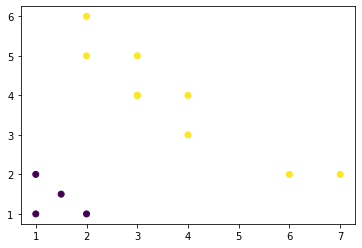

In [19]:
X_x1 = X[:,0]
X_x2 = X[:,1]
plt.scatter(X_x1, X_x2, c = y)
plt.show()

In [20]:
svcLinear =  SVC(kernel='linear', C=1).fit(X, y)
svcLinear.coef_, svcLinear.intercept_

(array([[0.49989823, 0.49989823]]), array([-2.49953185]))

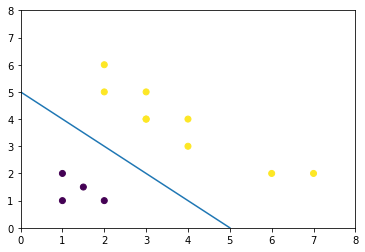

In [21]:
x1 = np.array([0, 5])
x2 = -1 *(svcLinear.intercept_ + svcLinear.coef_[0][0] * x1)/svcLinear.coef_[0][1]
plt.plot(x1, x2)
plt.scatter(X_x1, X_x2, c = y)
plt.axis([0, 8, 0, 8])
plt.show()

### Now adding one outlier

In [24]:
X = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,1,0,0,1,1,1,1,1,1,1,1,1]

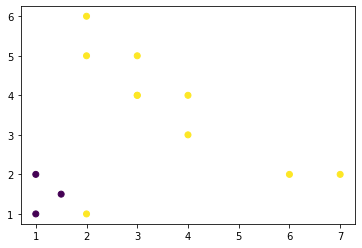

In [25]:
X_x1 = X[:,0]
X_x2 = X[:,1]
plt.scatter(X_x1, X_x2, c = y)
plt.show()

In [26]:
svcLinear =  SVC(kernel='linear', C=1).fit(X, y)
svcLinear.coef_, svcLinear.intercept_

(array([[0.8, 0.4]]), array([-2.6]))

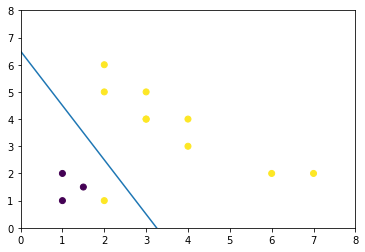

In [27]:
x1 = np.array([0, 5])
x2 = -1 *(svcLinear.intercept_ + svcLinear.coef_[0][0] * x1)/svcLinear.coef_[0][1]
plt.plot(x1, x2)
plt.scatter(X_x1, X_x2, c = y)
plt.axis([0, 8, 0, 8])
plt.show()

## Now changing value of C

In [28]:
svcLinear =  SVC(kernel='linear', C=10000).fit(X, y)
svcLinear.coef_, svcLinear.intercept_

(array([[3.99804688e+00, 2.22044605e-16]]), array([-6.99633789]))

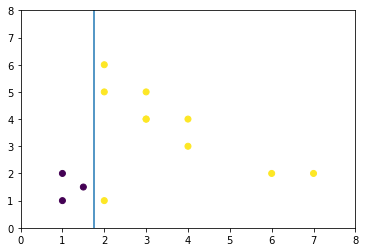

In [29]:
x1 = np.array([0, 5])
x2 = -1 *(svcLinear.intercept_ + svcLinear.coef_[0][0] * x1)/svcLinear.coef_[0][1]
plt.plot(x1, x2)
plt.scatter(X_x1, X_x2, c = y)
plt.axis([0, 8, 0, 8])
plt.show()

Overfitting

# SVM using IRIS data

In [1]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [3]:
x_train,x_test, y_train, y_test = train_test_split(x, y)

In [4]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [5]:
clf.score(x_test, y_test)

0.9736842105263158

## Creating/Visualizing Decision Boundary

### Using only 2 parameter  and  default gaussian kernel

In [6]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
iris = datasets.load_iris()
x = iris.data[:, 0:2]
y = iris.target

In [10]:
x_train,x_test, y_train, y_test = train_test_split(x, y)

In [12]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

In [13]:
clf.score(x_test, y_test)

0.7631578947368421

In [14]:
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min,x1_max,h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

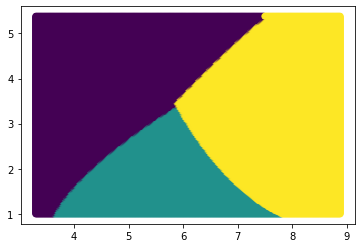

In [15]:
xx, yy = makegrid(x[:, 0], x[:, 1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

### Using only 2 parameter  and  linear kernel

In [16]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
iris = datasets.load_iris()
x = iris.data[:, 0:2]
y = iris.target

In [18]:
x_train,x_test, y_train, y_test = train_test_split(x, y)

In [20]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [21]:
clf.score(x_test, y_test)

0.7105263157894737

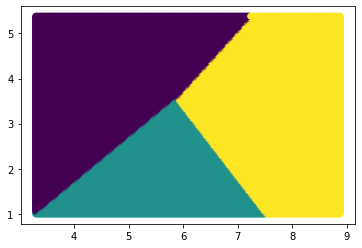

In [22]:
xx, yy = makegrid(x[:, 0], x[:, 1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

ravel()   is used to convert 2D array into contiguous 1D array

## changing value of 1/sigma^2   or    gamma 

In [41]:
clf = svm.SVC(gamma = 69)
clf.fit(x_train, y_train)

SVC(gamma=69)

In [42]:
clf.score(x_test, y_test)

0.631578947368421

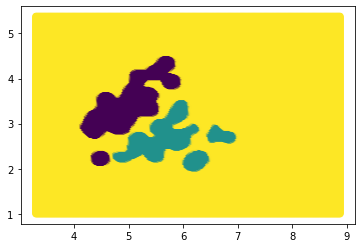

In [43]:
xx, yy = makegrid(x[:, 0], x[:, 1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()